# ***MACHINE LEARNING***

## *ÍNDICE:* 
---
0. INTRODUCCIÓN
1. ANÁLISIS EXPLORATORIO DE DATOS (EDA)
    - 1.1. Acondicionamiento bases de datos
    - 1.2. Análisis visual
    - 1.3. Análisis estadístico  
2. **MACHINE LEARNING**
    - [2.1. Preparación y limpieza de datos](#21)
    - [2.2. Feature Engineering](#22)
    - [2.3. Modelado](#23)
3. RESULTADOS
    - 3.1. Visualización y reporting de los resultados
    - 3.2. Creación de un pipeline para el flujo automatizado
---

##  **2.1. Preparación y limpieza de datos**<a id='21'></a>

In [ ]:
# Librerias
from utils.libreries import *

%matplotlib inline 

In [5]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder


In [2]:
# Definicion variables y constantes
PREROOT = os.getcwd()

target = 'class'

In [6]:
adults_cleaned = pd.read_csv(r'C:\Users\mareg\OneDrive\Documentos\TheBridge_Enero\Machine_Learning\test\Proyecto_Final\Proyecto_ML_Entrega\scr\data\processed\adults_cleaned.csv')
adults_cleaned.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [7]:
# Eliminar la columna "education-num" del DataFrame "adults_cleaned"
adults_cleaned.drop("education-num", axis=1, inplace=True)

# Ver los primeros registros del DataFrame actualizado
adults_cleaned.head(3)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native_country,class
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [8]:
adults_cleaned.shape

(32537, 14)

In [9]:
# Función para clasificar la educación en "Educación Primaria", "Educación Secundaria" y mantener "Educación Superior"
def clasificar_educacion(educacion):
    educacion_primaria = ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th"]
    educacion_secundaria = ["10th", "11th", "12th", "HS-grad"]

    if educacion in educacion_primaria:
        return "Primary-school"
    elif educacion in educacion_secundaria:
        return "Secondary-school"
    else:
        return educacion

adults_cleaned['education_new'] = adults_cleaned['education'].apply(clasificar_educacion)

adults_cleaned.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native_country,class,education_new
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Bachelors
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Bachelors
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Secondary-school
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Secondary-school
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Bachelors


In [10]:
adults_cleaned.education_new.nunique()

9

In [11]:
adults_cleaned.drop("education", axis=1, inplace=True)


In [12]:
adults_cleaned.rename(columns={'education_new': 'education'}, inplace=True)

### 
Reemplazamos cada valor  con un número entero distinto. Los usaremos con variables ordinales como "education".

In [13]:
# Lista de columnas categóricas para aplicar One-Hot Encoding
categorical_columns = ['age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native_country','class']

# Aplicar One-Hot Encoding a las columnas categóricas
dummies = pd.get_dummies(adults_cleaned[categorical_columns], drop_first=True)

# Concatenar las variables binarias con el DataFrame original
df_encoded = pd.concat([adults_cleaned.drop(columns=categorical_columns), dummies], axis=1)

df_encoded.head()

,fnlwgt,capital-gain,capital-loss,hours-per-week,age,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,class_>50K
0,77516,2174,0,40,39,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,83311,0,0,13,50,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,215646,0,0,40,38,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,234721,0,0,40,53,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,338409,0,0,40,28,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_encoded.dtypes

fnlwgt                            int64
capital-gain                      int64
capital-loss                      int64
hours-per-week                    int64
age                               int64
                                  ...  
native_country_Trinadad&Tobago    uint8
native_country_United-States      uint8
native_country_Vietnam            uint8
native_country_Yugoslavia         uint8
class_>50K                        uint8
Length: 90, dtype: object

In [15]:
df_encoded.to_csv('adults_cleaned_encoded.csv', index=False)

In [16]:
# Carga de datos
df_train=pd.read_csv(r'C:\Users\mareg\OneDrive\Documentos\TheBridge_Enero\Machine_Learning\test\Proyecto_Final\Proyecto_ML_Entrega\scr\data\processed\adults_cleaned_encoded.csv')
df_train.head()

,fnlwgt,capital-gain,capital-loss,hours-per-week,age,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,class_>50K
0,77516,2174,0,40,39,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,83311,0,0,13,50,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,215646,0,0,40,38,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,234721,0,0,40,53,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,338409,0,0,40,28,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 90 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   fnlwgt                                     32537 non-null  int64
 1   capital-gain                               32537 non-null  int64
 2   capital-loss                               32537 non-null  int64
 3   hours-per-week                             32537 non-null  int64
 4   age                                        32537 non-null  int64
 5   workclass_Local-gov                        32537 non-null  int64
 6   workclass_Never-worked                     32537 non-null  int64
 7   workclass_Private                          32537 non-null  int64
 8   workclass_Self-emp-inc                     32537 non-null  int64
 9   workclass_Self-emp-not-inc                 32537 non-null  int64
 10  workclass_State-gov                        325

#### División de la data:

In [18]:
 
df_train=pd.read_csv(r'C:\Users\mareg\OneDrive\Documentos\TheBridge_Enero\Machine_Learning\test\Proyecto_Final\Proyecto_ML_Entrega\scr\data\processed\adults_cleaned_encoded.csv')
df_train.head()

,fnlwgt,capital-gain,capital-loss,hours-per-week,age,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,class_>50K
0,77516,2174,0,40,39,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,83311,0,0,13,50,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,215646,0,0,40,38,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,234721,0,0,40,53,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,338409,0,0,40,28,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Subdivisión train y validation 

In [23]:
pip install scikit-learn

     ---------------------------------------- 9.2/9.2 MB 8.2 MB/s eta 0:00:00
  Using cached joblib-1.3.1-py3-none-any.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection  import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [25]:
# Definir los datos de entrenamiento y la variable objetivo
X = df_train.drop(columns=['class_>50K'])  # DataFrame sin la columna objetivo 'class'
y = df_train['class_>50K']  # Serie con la columna objetivo 'class'

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> `NOTA:` todo lo que se haga al df_train se le realizará al df_validation y así simularía la nueva data, que se comprobará con testing_set

In [26]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (32537, 89)
Train features shape: (26029, 89)
Train target shape: (26029,)
Test features shape: (6508, 89)
Test target shape: (6508,)


##  **2.2. Feature Engineering**<a id='22'></a>

In [28]:
!pip install seaborn    


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\mareg\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

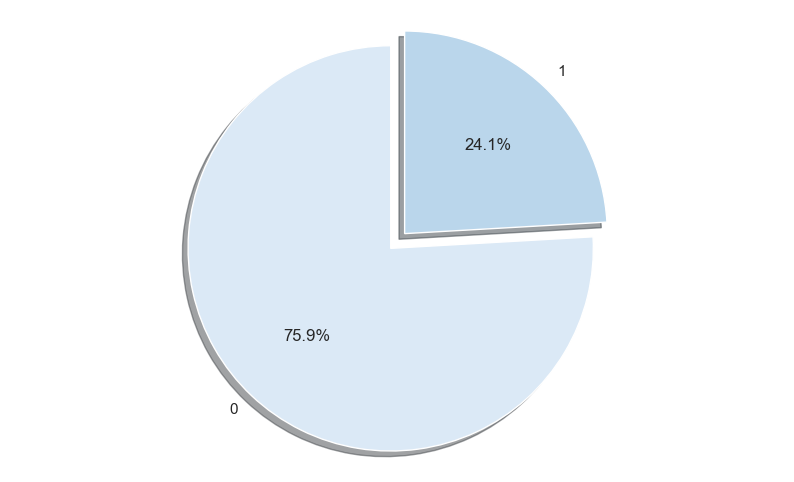

In [21]:
sns.set(rc={'figure.figsize':(10, 6)})
colors = sns.color_palette("Blues")

labels = df_train['class_>50K'].value_counts().index
sizes = df_train['class_>50K'].value_counts()
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%', # type: ignore
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

In [22]:
import seaborn as sns

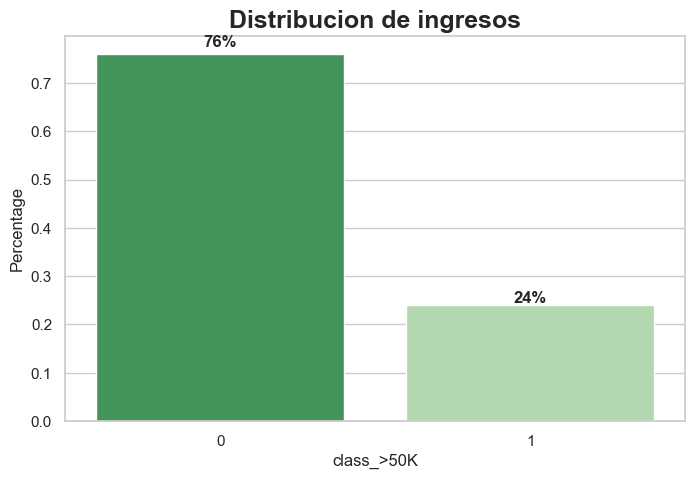

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
plt.title('Distribucion de ingresos', fontsize=18, fontweight='bold')

eda_percentage = df_train['class_>50K'].value_counts(normalize=True).rename_axis('class_>50K').reset_index(name='Percentage')

ax = sns.barplot(x='class_>50K', y='Percentage', data=eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height * 1.02), ha='center', fontweight='bold')

plt.show()

**Observaciones:**

- Dataset ligeramente desbalanceado 70% vs 30%

**Propuestas:**

Al tener un dataset desbalanceado se buscan una serie de opciones, en este caso, suponiendo que no se puedan obtener más datos que equilibren nuestro dataset se plantean las siguientes opciones.
- Opciones para *balancear la data*:

    - Oversampling.
    - Undersampling.
    - Métodos mixtos.
Planteamiento: baseline sin balancear, balanceado aleatorio, algoritmo ROSE y algoritmo SMOTE.


##  **2.3. Modelado**<a id='23'></a>

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 90 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   fnlwgt                                     32537 non-null  int64
 1   capital-gain                               32537 non-null  int64
 2   capital-loss                               32537 non-null  int64
 3   hours-per-week                             32537 non-null  int64
 4   age                                        32537 non-null  int64
 5   workclass_Local-gov                        32537 non-null  int64
 6   workclass_Never-worked                     32537 non-null  int64
 7   workclass_Private                          32537 non-null  int64
 8   workclass_Self-emp-inc                     32537 non-null  int64
 9   workclass_Self-emp-not-inc                 32537 non-null  int64
 10  workclass_State-gov                        325

In [26]:
df_train.shape

(32537, 90)

## Baseline:

Con este apartado se pretende hacer una `prueba de contacto` con los modelos ***sin tratar los datos apenas***, ***sin buscar los hiperparámetros que mejor ajusten*** y ***sin balancear el dataset***. Simplemente para tener una noción del punto de partida y las diferencias sustanciales de cada modelo, aunque esto pueda cambiar con las modificaciones que se desarrollan posteriormente.

In [ ]:
# Elección del / los modelos
#modelos = choose_models('all', None, clf = True)

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import os


In [28]:
import os

file_name = 'baseline_metrics.csv'

if not os.path.exists(file_name):
    with open(file_name, 'w', newline='') as f:
        pass

In [29]:
import csv

In [29]:

#def baseline(X_train, y_train, X_test, y_test, base_model, file_name):
    # Ajustar el modelo base al conjunto de entrenamiento
    if base_model.__class__.__name__ == 'Sequential':
        model = Sequential()
        model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))  # Capa de salida con una neurona y activación sigmoide
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
        y_pred = np.round(model.predict(X_test))  # Redondear la salida para obtener la clase binaria (0 o 1)
    else:
        X_train_contiguous = np.ascontiguousarray(X_train)  # Convertir X_train a una matriz contigua
        X_test_contiguous = np.ascontiguousarray(X_test)  # Convertir X_test a una matriz contigua

        base_model.fit(X_train_contiguous, y_train)
        y_pred = base_model.predict(X_test_contiguous)

    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Guardar las métricas en un archivo CSV
    metrics = pd.DataFrame({
        'Model': [str(base_model)],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1': [f1]
    })
    
    # Guardar las métricas en un archivo CSV
    model_name = str(base_model)
    with open(file_name, 'a', newline='') as f:
        writer = csv.writer(f, delimiter=';')
        writer.writerow([model_name, accuracy, recall, precision, f1])
    
    return y_pred, accuracy

IndentationError: unexpected indent (1745748066.py, line 3)

In [30]:
def baseline(X_train, y_train, X_test, y_test, base_model, file_name):
    # Ajustar el modelo base al conjunto de entrenamiento
    if base_model.__class__.__name__ == 'Sequential':
        model = Sequential()
        model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))  # Capa de salida con una neurona y activación sigmoide
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
        y_pred = np.round(model.predict(X_test))  # Redondear la salida para obtener la clase binaria (0 o 1)
    else:
        X_train_contiguous = np.ascontiguousarray(X_train)  # Convertir X_train a una matriz contigua
        X_test_contiguous = np.ascontiguousarray(X_test)  # Convertir X_test a una matriz contigua

        base_model.fit(X_train_contiguous, y_train)
        y_pred = base_model.predict(X_test_contiguous)

    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)


    # Guardar las métricas en un archivo CSV
    model_name = str(base_model)
    header = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1']  # Nombres de las columnas
    data_row = [model_name, accuracy, precision, recall, f1]
    
    with open(file_name, 'a', newline='') as f:
        writer = csv.writer(f, delimiter=';')
        writer.writerow([model_name, accuracy, precision, recall, f1])

    return y_pred, accuracy, precision, recall, f1

    # Directorio y nombre del archivo de métricas
#dir_file = os.path.join(os.getcwd(), 'model', 'model_metrics')
#os.makedirs(dir_file, exist_ok=True)
#file_name = os.path.join(dir_file, 'baseline_metrics.csv')


Entrenamos 12 modelos

In [31]:

# Definir los modelos y sus nombres
models = {
    'LogReg': LogisticRegression(),
    'KNNC': KNeighborsClassifier(),
    'DTC': DecisionTreeClassifier(),
    'RFC': RandomForestClassifier(),
    'BagC': BaggingClassifier(),
    'AdaBC': AdaBoostClassifier(),
    'GBC': GradientBoostingClassifier(),
    'SVC': SVC(),
    'XGBC': XGBClassifier(),
    'VC': VotingClassifier(estimators=[('RFC', RandomForestClassifier())]),
    'LDA': LinearDiscriminantAnalysis(),
    'SQL': Sequential()
}


In [32]:
# Directorio y nombre del archivo de métricas
dir_file = os.path.join(os.getcwd(), 'model', 'model_metrics')
os.makedirs(dir_file, exist_ok=True)
file_name = os.path.join(dir_file, 'baseline_metrics.csv')

# Abrir el archivo CSV en modo de adición una vez antes de entrenar los modelos
with open(file_name, 'a', newline='') as f:
    writer = csv.writer(f, delimiter=';')


In [41]:

# Llamar a la función baseline para cada modelo
for model_name, model in models.items():
    y_pred, accuracy, precision, recall, f1 = baseline(X_train, y_train, X_test, y_test, model, file_name)
    print(f'{model_name}:')
    print('Predicciones:', y_pred)
    print('Exactitud (Accuracy):', accuracy)
    print('Precisión:', precision)
    print('Recall:', recall)
    print('F1:', f1)
    print('-' * 30)

# Leer el archivo de métricas y mostrar la comparación
df_baseline_metrics = pd.read_csv(file_name, sep=';')

print(df_baseline_metrics)


LogReg:
Predicciones: [0 0 0 ... 0 0 1]
Exactitud (Accuracy): 0.7894898586355255
Precisión: 0.695142378559464
Recall: 0.25888958203368684
F1: 0.37727272727272726
------------------------------
KNNC:
Predicciones: [0 0 0 ... 0 0 0]
Exactitud (Accuracy): 0.7653657037492317
Precisión: 0.5405982905982906
Recall: 0.3156581409856519
F1: 0.3985821189444664
------------------------------
DTC:
Predicciones: [0 0 1 ... 0 0 0]
Exactitud (Accuracy): 0.8023970497848801
Precisión: 0.5960024227740763
Recall: 0.6138490330630069
F1: 0.6047940995697603
------------------------------
RFC:
Predicciones: [0 0 0 ... 0 0 1]
Exactitud (Accuracy): 0.8526429010448678
Precisión: 0.7378138847858198
Recall: 0.6232064878353087
F1: 0.6756848156915792
------------------------------
BagC:
Predicciones: [1 0 0 ... 0 0 1]
Exactitud (Accuracy): 0.8392747387830363
Precisión: 0.7124332570556827
Recall: 0.5826575171553338
F1: 0.6410432395332876
------------------------------
AdaBC:
Predicciones: [0 0 0 ... 0 0 1]
Exactitud 

In [42]:
df_baseline_metrics = pd.read_csv(file_name, sep=';', names=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

In [43]:
output_file_name = 'metrics_output'
df_baseline_metrics.to_csv(output_file_name, index=False)

In [44]:
metrics_output = pd.read_csv(output_file_name)
metrics_output.head(20)

,Model,Accuracy,Precision,Recall,F1
0,LogisticRegression(),0.789490,0.695142,0.258890,0.377273
1,KNeighborsClassifier(),0.765366,0.540598,0.315658,0.398582
2,DecisionTreeClassifier(),0.802397,0.596002,0.613849,0.604794
3,RandomForestClassifier(),0.852643,0.737814,0.623206,0.675685
4,BaggingClassifier(),0.839275,0.712433,0.582658,0.641043
5,AdaBoostClassifier(),0.863706,0.783228,0.617592,0.690617
6,GradientBoostingClassifier(),0.865396,0.797220,0.608235,0.690021
7,SVC(),0.789490,0.979424,0.148472,0.257855
8,"XGBClassifier(base_score=None, booster=None, c...",0.868162,0.778193,0.650031,0.708362
9,"VotingClassifier(estimators=[('RFC', RandomFor...",0.854026,0.741316,0.625702,0.678620


In [ ]:
#baseline_metrics = df_baseline_metrics[['Model', 'Accuracy', 'Precision', 'Recall', 'F1']]

In [36]:
#baseline_metricas = pd.read_csv(r'C:\Users\mareg\OneDrive\Documentos\TheBridge_Enero\Machine_Learning\test\Proyecto_Final\Proyecto_ML_Entrega\scr\utils\model\model_metrics\baseline_metrics.csv', sep=';')

Accuracy (Exactitud): La proporción de predicciones correctas sobre el total de predicciones.
Precision (Precisión): La proporción de verdaderos positivos (ganar más de 50k) entre todas las predicciones positivas (personas predichas como ganando más de 50k).
Recall (Sensibilidad o Tasa de Verdaderos Positivos): La proporción de verdaderos positivos entre todos los casos positivos reales (personas que ganan más de 50k).
F1-score: Es una medida que combina tanto la precisión como el recall en una sola métrica que considera el equilibrio entre ambas.

In [45]:
metrics_output.sort_values(by='Recall', ascending=False, inplace=True)

In [46]:
metrics_output

,Model,Accuracy,Precision,Recall,F1
8,"XGBClassifier(base_score=None, booster=None, c...",0.868162,0.778193,0.650031,0.708362
9,"VotingClassifier(estimators=[('RFC', RandomFor...",0.854026,0.741316,0.625702,0.678620
3,RandomForestClassifier(),0.852643,0.737814,0.623206,0.675685
5,AdaBoostClassifier(),0.863706,0.783228,0.617592,0.690617
2,DecisionTreeClassifier(),0.802397,0.596002,0.613849,0.604794
6,GradientBoostingClassifier(),0.865396,0.797220,0.608235,0.690021
10,LinearDiscriminantAnalysis(),0.848494,0.743874,0.587024,0.656206
4,BaggingClassifier(),0.839275,0.712433,0.582658,0.641043
1,KNeighborsClassifier(),0.765366,0.540598,0.315658,0.398582
11,<keras.engine.sequential.Sequential object at ...,0.804241,0.777403,0.287586,0.419854


In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Modelo 8: XGBoostingClassifier()

In [48]:
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix

array([[4773,  132],
       [1142,  461]], dtype=int64)

In [49]:
acierto = accuracy_score(y_test, y_pred)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 80.42 %
Error: 19.58 %


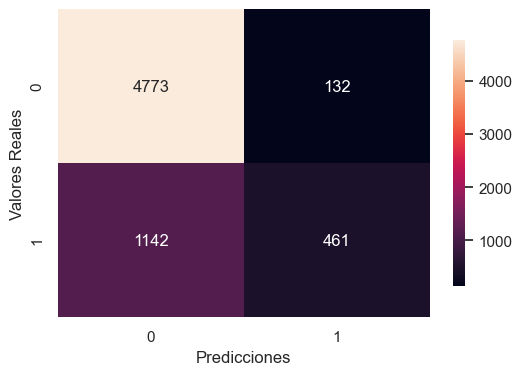

In [50]:
# Configurar el tamaño de la figura
plt.figure(figsize=(6, 4))

# Crear el heatmap
sns.heatmap(c_matrix, annot=True, fmt='d', cbar_kws={"shrink": 0.8})

# Agregar etiquetas de los ejes
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')

# Mostrar el heatmap
plt.show()

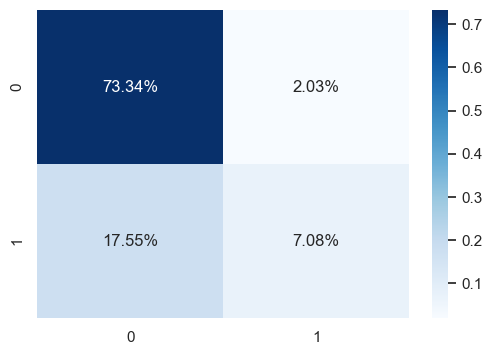

In [51]:
# Configurar el tamaño de la figura
plt.figure(figsize=(6, 4))


sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, 
            fmt='.2%', cmap='Blues');

<Axes: >

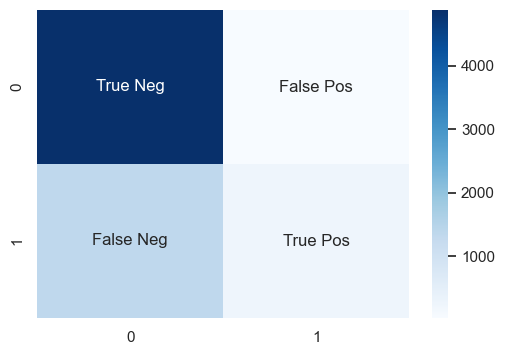

In [47]:
plt.figure(figsize=(6, 4))
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')

<module 'matplotlib.pyplot' from 'C:\\Users\\mareg\\AppData\\Roaming\\Python\\Python310\\site-packages\\matplotlib\\pyplot.py'>

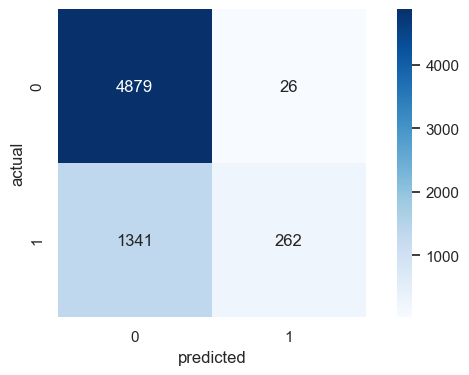

In [48]:
# Confusion matrix 
plt.figure(figsize= [8, 4])
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

**¿Qué métrica priorizar?** 


La mejor métrica para usar dependerá de la aplicación específica. 
 Para no clasificar ningún negativo como positivo es mejor usar la precisión .Una alta precisión significa que el modelo tiene pocas falsas alarmas (casos donde predice positivo pero es negativo).
En este dataset, el target es una clasificación binaria, por lo que la métrica ACCURACY si es una buena medida para El rendimiento global.
  
No obstante para el desarrollo de un modelo que se aplique para otorgar ayudas para pedir préstamos quizás se debería usar el RECALL.Ejemplo predecir el de pobreza en los proximos años en función de determinadas variables https://confrontingpoverty.org/poverty-risk-calculator/ la PRECISION

In [52]:
#Ordenado por Accuracy
metrics_output

,Model,Accuracy,Precision,Recall,F1
8,"XGBClassifier(base_score=None, booster=None, c...",0.868162,0.778193,0.650031,0.708362
9,"VotingClassifier(estimators=[('RFC', RandomFor...",0.854026,0.741316,0.625702,0.678620
3,RandomForestClassifier(),0.852643,0.737814,0.623206,0.675685
5,AdaBoostClassifier(),0.863706,0.783228,0.617592,0.690617
2,DecisionTreeClassifier(),0.802397,0.596002,0.613849,0.604794
6,GradientBoostingClassifier(),0.865396,0.797220,0.608235,0.690021
10,LinearDiscriminantAnalysis(),0.848494,0.743874,0.587024,0.656206
4,BaggingClassifier(),0.839275,0.712433,0.582658,0.641043
1,KNeighborsClassifier(),0.765366,0.540598,0.315658,0.398582
11,<keras.engine.sequential.Sequential object at ...,0.804241,0.777403,0.287586,0.419854


Ordenamos por precision

In [50]:
metrics_output.sort_values(by='Precision', ascending=False, inplace=True)

In [53]:
metrics_output

,Model,Accuracy,Precision,Recall,F1
8,"XGBClassifier(base_score=None, booster=None, c...",0.868162,0.778193,0.650031,0.708362
9,"VotingClassifier(estimators=[('RFC', RandomFor...",0.854026,0.741316,0.625702,0.678620
3,RandomForestClassifier(),0.852643,0.737814,0.623206,0.675685
5,AdaBoostClassifier(),0.863706,0.783228,0.617592,0.690617
2,DecisionTreeClassifier(),0.802397,0.596002,0.613849,0.604794
6,GradientBoostingClassifier(),0.865396,0.797220,0.608235,0.690021
10,LinearDiscriminantAnalysis(),0.848494,0.743874,0.587024,0.656206
4,BaggingClassifier(),0.839275,0.712433,0.582658,0.641043
1,KNeighborsClassifier(),0.765366,0.540598,0.315658,0.398582
11,<keras.engine.sequential.Sequential object at ...,0.804241,0.777403,0.287586,0.419854


Balance entre varianza y sesgo: Con K=10, el modelo se entrena en 90% de los datos y se valida en el 10% restante. Esto proporciona un buen equilibrio entre la varianza y el sesgo. Un valor más bajo de K (por ejemplo, K=5) puede resultar en una estimación de rendimiento más variable (mayor varianza), mientras que un valor más alto de K (por ejemplo, K=20) puede llevar a una estimación más sesgada (menor varianza pero mayor sesgo).

Eficiencia computacional: K=10 generalmente proporciona una buena estimación
Datasets pequeños o moderados: K=10 es adecuado para datasets de tamaño moderado.

In [52]:

from sklearn.model_selection import StratifiedKFold

CV en funcion de Accuracy

In [53]:
sns.set(rc={'figure.figsize':(15, 8)})
# Cross validate model with Kfold stratified cross val
K_fold = StratifiedKFold(n_splits=10)
metric = 'F1'

metrics_output.sort_values(by=metric, ascending=False, inplace=True)
#saved_baseline_metrics = pd.read_csv('model/model_metrics/baseline_metrics.csv',sep=';').sort_values(by=metric,ascending=False)

cv_means = metrics_output[metric]
cv_means = cv_means[:-1]
lista = metrics_output['Model']
lista = lista[:-1]

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means.astype(float),
        "Algorithms": lista
    })



In [54]:
cv_frame

,CrossValMeans,Algorithms
8,0.708362,"XGBClassifier(base_score=None, booster=None, c..."
5,0.690617,AdaBoostClassifier()
6,0.690021,GradientBoostingClassifier()
3,0.682631,RandomForestClassifier()
9,0.679730,"VotingClassifier(estimators=[('RFC', RandomFor..."
10,0.656206,LinearDiscriminantAnalysis()
4,0.643478,BaggingClassifier()
2,0.608669,DecisionTreeClassifier()
1,0.398582,KNeighborsClassifier()
0,0.377273,LogisticRegression()


La clasificación queda igual que antes aunque a partir del Bagging baja un poco

In [1]:
import re

In [2]:

def clean_model_name(model_name):
    return re.sub(r'\([^()]*\)', '', model_name).strip()

# Aplicar la función a la columna 'Algorithms'
cv_frame['Algorithms'] = cv_frame['Algorithms'].apply(clean_model_name)

sns.set(rc={'figure.figsize': (15, 8)})
cv_plot = sns.barplot(x="CrossValMeans", y="Algorithms", data=cv_frame, palette='coolwarm')

# Ajustar tamaño y espaciado de las etiquetas del eje y
font_size = 12
spacing = 0.5
cv_plot.set_yticklabels(cv_frame['Algorithms'], fontsize=font_size)
plt.yticks(range(len(cv_frame['Algorithms'])), cv_frame['Algorithms'])

cv_plot.set_xlabel("F1")
cv_plot.set_title("Comparación Baseline")
plt.show()

NameError: name 'cv_frame' is not defined

CV con Precisión

In [57]:
sns.set(rc={'figure.figsize':(15, 8)})
# Cross validate model with Kfold stratified cross val
K_fold1 = StratifiedKFold(n_splits=10)
metric = 'Precision'

metrics_output.sort_values(by=metric, ascending=False, inplace=True)
#saved_baseline_metrics = pd.read_csv('model/model_metrics/baseline_metrics.csv',sep=';').sort_values(by=metric,ascending=False)

cv_means1 = metrics_output[metric]
cv_means1 = cv_means1[:-1]
lista1 = metrics_output['Model']
lista1 = lista1[:-1]

cv_frame1 = pd.DataFrame(
    {
        "CrossValMeans":cv_means1.astype(float),
        "Algorithms": lista1
    })


In [58]:
cv_frame1

,CrossValMeans,Algorithms
7,0.979424,SVC()
11,0.909722,<keras.engine.sequential.Sequential object at ...
6,0.797220,GradientBoostingClassifier()
5,0.783228,AdaBoostClassifier()
8,0.778193,"XGBClassifier(base_score=None, booster=None, c..."
10,0.743874,LinearDiscriminantAnalysis()
3,0.743025,RandomForestClassifier()
9,0.741341,"VotingClassifier(estimators=[('RFC', RandomFor..."
4,0.727201,BaggingClassifier()
0,0.695142,LogisticRegression()


CV con métrica Recall

In [60]:
sns.set(rc={'figure.figsize':(15, 8)})
# Cross validate model with Kfold stratified cross val
K_fold2 = StratifiedKFold(n_splits=10)
metric = 'Recall'

metrics_output.sort_values(by=metric, ascending=False, inplace=True)
#saved_baseline_metrics = pd.read_csv('model/model_metrics/baseline_metrics.csv',sep=';').sort_values(by=metric,ascending=False)

cv_means2 = metrics_output[metric]
cv_means2 = cv_means2[:-1]
lista2 = metrics_output['Model']
lista2 = lista2[:-1]

cv_frame2 = pd.DataFrame(
    {
        "CrossValMeans":cv_means2.astype(float),
        "Algorithms": lista1
    })


In [61]:
cv_frame2

,CrossValMeans,Algorithms
0,0.258890,LogisticRegression()
1,0.315658,NaN
2,0.617592,DecisionTreeClassifier()
3,0.631316,RandomForestClassifier()
4,0.577043,BaggingClassifier()
5,0.617592,AdaBoostClassifier()
6,0.608235,GradientBoostingClassifier()
7,NaN,SVC()
8,0.650031,"XGBClassifier(base_score=None, booster=None, c..."
9,0.627573,"VotingClassifier(estimators=[('RFC', RandomFor..."


**Observaciones:**

- La métrica Accuracy es elevada todos los modelos probados, casi todos por encima del 80% . esta métrica se mantiene tras el K-fold . en el caso de la metrica Precision, el SVC nos da una métrica muy elevada, 98%  y entran nuevos modelos en el rango superior del ranking como Keras, baja el RandomForest y aumenta también el rendimiento de Lineardiscrimination. Las metricas de Recall son muy bajas, esto puede deberse a los datos desbalanceados o falta de ajuste de los parámetros.

- Sería conveniente centrarse en: 

    * GradientBoostingClassifier
    * XGBoostClassifier
    * AdaBoostClassifier
    * RandomForestClassifier()
    * GradientBoostingClassifier
    * VotingClassifier
    * Bagging
    y 
    * SVC 
    * keras.engine.sequential
    * LinearDiscriminantAnalysis
    Por la alta precision que tambien demuestran 

**Propuestas:**

- Opciones de *métricas de evaluación* del modelo de clasificación:

    - **Accuracy**.
    - **Precision**.
    - Recall.
    - F1.

## Ajuste de hiperparámetros:

Con este apartado se pretende `mejorar estimadores` realizando el ***ajuste de hiperparámetros***.  
Estos estimadores se obtienen de introducir todas las variables y sin haberle realizado modificaciones significativas a sus datos: ***falta tratar los datos*** y ***balancear el dataset***. 


Mi codigo: 

In [144]:
from sklearn.model_selection import GridSearchCV

min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy']
    


In [158]:
# Definir los hiperparametros del modelo Gradient Boost Classifier y XGBoost classifier
params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'min_samples_split': [2, 3],

}

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [179]:

# Definir las métricas que deseas evaluar
#scoring = { 'accuracy': accuracy}

In [167]:
k_fold= 5

In [184]:
#Create Gridsearch with my model['GBC'] 
grid = GridSearchCV(models['GBC'], params, scoring='accuracy', cv=K_fold,refit='accuracy')
GBC_gs = grid.fit(X_train, y_train)  

In [185]:
GBC_gs.best_params_ 


{'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 200}

In [186]:
GBC_gs.best_estimator_

GradientBoostingClassifier(max_depth=5, min_samples_split=3, n_estimators=200)

In [202]:
import pickle   
pickle.dump(GBC_gs, open(r'model/GBC_gs.pkl', 'wb'))

In [206]:

def perform_grid_search(model_name, model, params, X_train, y_train, X_test, y_test, cv):
    # Crea el objeto GridSearchCV para el modelo especificado
    grid_search = GridSearchCV(model, params, scoring='recall', cv=cv, refit='recall')
    
    # Realiza la búsqueda en cuadrícula utilizando los datos de entrenamiento
    grid_search.fit(X_train, y_train)
    
    # Obtén el mejor modelo
    best_model = grid_search.best_estimator_
    
    # Realiza predicciones en el conjunto de prueba utilizando el mejor modelo
    y_pred = best_model.predict(X_test)
    
    # Evalúa el rendimiento del mejor modelo en el conjunto de prueba utilizando Recall
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"Recall del mejor modelo {model_name} en el conjunto de prueba: {recall:.2f}")
    
    # Guarda el mejor modelo con Pickle
    with open(f"{model_name}_best_model.pkl", 'wb') as f:
        pickle.dump(best_model, f)
    
    # Devuelve el mejor modelo y los resultados de la búsqueda en cuadrícula
    return best_model, grid_search.cv_results_

# Carga el conjunto de datos (ejemplo con Iris)

# Define los hiperparámetros para el Gradient Boosting Classifier
gbc_params = {
    'n_estimators': [150, 300],
    'max_depth': [3, 6],
    'min_samples_split': [2, 3],
}

# Define los hiperparámetros para el XGBoost Classifier
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'min_samples_split': [2, 3],
}

# Define los hiperparámetros para el RandomForest Classifier
rfc_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'min_samples_split': [2, 3],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy']
}

# Realiza la búsqueda en cuadrícula para el Gradient Boosting Classifier
gbc_model, gbc_results = perform_grid_search('Gradient Boosting Classifier', models['GBC'], gbc_params, X_train, y_train, X_test, y_test, cv=k_fold)

# Realiza la búsqueda en cuadrícula para el XGBoost Classifier
xgb_model, xgb_results = perform_grid_search('XGBoost Classifier', XGBClassifier(), xgb_params, X_train, y_train, X_test, y_test, cv=k_fold)

# Realiza la búsqueda en cuadrícula para el RandomForest Classifier
rfc_model, rfc_results = perform_grid_search('Random Forest Classifier', RandomForestClassifier(), rfc_params, X_train, y_train, X_test, y_test, cv=k_fold)

Recall del mejor modelo Gradient Boosting Classifier en el conjunto de prueba: 0.87
[00:21:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[00:21:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[00:21:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[00:21:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[00:21:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-

c:\Users\mareg\anaconda3\envs\general\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mareg\anaconda3\envs\general\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mareg\anaconda3\envs\general\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\mareg\anaconda3\envs\general\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints

Recall del mejor modelo Random Forest Classifier en el conjunto de prueba: 0.82


In [216]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

In [219]:
# Define el modelo GradientBoostingClassifier
gbc_model = GradientBoostingClassifier()


In [220]:
# Define los hiperparámetros que deseas ajustar para el GradientBoostingClassifier
gbc_params = {
    'n_estimators': randint(150, 400),        # Número de árboles entre 150 y 400
    'max_depth': randint(3, 7),               # Profundidad máxima entre 3 y 6
    'min_samples_split': randint(2, 4),       # Mínimo de muestras para dividir entre 2 y 3 
}

# Crea el objeto RandomizedSearchCV para el GradientBoostingClassifier
random_search = RandomizedSearchCV(gbc_model, gbc_params, n_iter=50, scoring='recall', cv=5, refit='recall', random_state=42)

# Realiza la búsqueda aleatoria utilizando los datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtén el mejor modelo
best_gbc_model = random_search.best_estimator_

# Renombra el modelo a gbc_model2
gbc_model2 = best_gbc_model

# Guarda el mejor modelo con Pickle
with open("best_gbc_model.pkl", 'wb') as f:
    pickle.dump(gbc_model2, f)

# Realiza predicciones en el conjunto de prueba utilizando el mejor modelo
y_pred_gbc = gbc_model2.predict(X_test)

# Evalúa el recall del mejor modelo GradientBoostingClassifier en el conjunto de prueba
recall_gbc = recall_score(y_test, y_pred_gbc)
print(f"Recall del mejor modelo GradientBoostingClassifier en el conjunto de prueba: {recall_gbc:.2f}")

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

Recall del mejor modelo GradientBoostingClassifier en el conjunto de prueba: 0.66
Mejores hiperparámetros encontrados:
{'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 349}


In [ ]:
# Define el modelo GradientBoostingClassifier
gbc_model2 = GradientBoostingClassifier()

# Define los hiperparámetros que deseas ajustar para el GradientBoostingClassifier
gbc_params = {
    'n_estimators': randint(150, 400),       # Número de árboles entre 150 y 300
    'max_depth': randint(3, 7),              # Profundidad máxima entre 3 y 6
    'min_samples_split': randint(2, 4),      # Mínimo de muestras para dividir entre 2 y 3
    'learning_rate': [0.01, 0.05, 0.1, 0.2], # Tasa de aprendizaje para probar valores específicos
    
}

# Crea el objeto RandomizedSearchCV para el GradientBoostingClassifier
random_search = RandomizedSearchCV(gbc_model2, gbc_params, n_iter=50, scoring='recall', cv=5, refit='recall', random_state=42)

# Realiza la búsqueda aleatoria utilizando los datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtén el mejor modelo
best_gbc_model2 = random_search.best_estimator_

# Realiza predicciones en el conjunto de prueba utilizando el mejor modelo
y_pred_gbc = best_gbc_model2.predict(X_test)

# Evalúa el recall del mejor modelo GradientBoostingClassifier en el conjunto de prueba
recall_gbc = recall_score(y_test, y_pred_gbc)
print(f"Recall del mejor modelo GradientBoostingClassifier en el conjunto de prueba: {recall_gbc:.2f}")

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

In [145]:
def train_predict_best_model(X_train, y_train, X_test, model, params, scoring, random=77, scaling=False, balancing=False, scaler=None): 
    # Escalado:
    if scaling:
        if scaler == None:
            scaler = StandardScaler().fit(X_train)
        X_train = list(scaler.transform(X_train))
        X_test = scaler.transform(X_test)
    
    # Balanceo
    if balancing:
        sm = SMOTEENN(random_state=random) 
        X_train, y_train = sm.fit_resample(X_train, y_train)

    # Entrenando al modelo: 
    estimator = GridSearchCV(model, params, scoring=scoring, refit='Accuracy', return_train_score=True)
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)

    # Retornar el modelo entrenado y las predicciones
    return estimator, y_pred

In [146]:

from sklearn.metrics import make_scorer

In [147]:
# diccionario de métricas de evaluación
scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score), "Recall": make_scorer(recall_score)}

In [148]:
import numpy as np

In [154]:
import random  
random_value = 42 
# Definir el valor de 'scaling'
scaling = False #  cambiar este valor a False si no deseas escalar los datos
balancing = False
scaler = False
clf = True

In [155]:
from funcionesMa import eval_metrics

In [156]:
# Definir la lista de modelos y sus hiperparámetros
model_params = [
    ('LogReg', {'C': [0.1, 1, 10]}),  # Ejemplo de hiperparámetros para Logistic Regression
    ('KNNC', {'n_neighbors': [3, 5, 7]}),  # Ejemplo de hiperparámetros para KNeighborsClassifier
    ('DTC', {'max_depth': [None, 10, 20]}),  # Ejemplo de hiperparámetros para DecisionTreeClassifier
    # Agrega más modelos y sus hiperparámetros aquí
]

# Lista para almacenar los resultados de los modelos
best_model_metrics = []

# Bucle para ajustar y evaluar los modelos
for mod, params in model_params:
    model = models[mod]  # Obtén el modelo correspondiente al nombre de la lista 'models'
    model_name = f"{mod} - {params}"  # Nombre del modelo para identificarlo en los resultados
    
    # Realiza el ajuste de hiperparámetros y obtén el modelo entrenado y las predicciones
    estimator, y_pred = train_predict_best_model(X_train, y_train, X_test, model, params, scoring,
                                                  random=random, scaling=scaling, balancing=balancing, scaler=None)
    
    # Evaluación de métricas
    metrics = eval_metrics(y_pred, y_test, clf)
    
    # Almacena el modelo y sus métricas en la lista de resultados
    best_model_metrics.append((model_name, estimator, y_pred, metrics))

# Ordenar la lista de resultados en función del recall (u otra métrica deseada)
best_model_metrics.sort(key=lambda x: x[3]['Recall'], reverse=True)

# Obtener el mejor modelo y sus métricas
best_model = best_model_metrics[0]

# Imprimir el nombre del mejor modelo y sus métricas
print("Mejor modelo:", best_model[0])
print("Métricas:", best_model[3])

c:\Users\mareg\anaconda3\envs\general\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mareg\anaconda3\envs\general\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

NameError: name 'accuracy_score' is not defined

In [ ]:

# Crear y entrenar el modelo SVC
clf = SVC(probability=True)
clf.fit(X_train, y_train)

# Obtener las probabilidades estimadas para las muestras de entrada
probas = clf.predict_proba(X_train)

print(probas)

##### Generar varios modelos mediante for

In [ ]:
models_names = list(choose_models('all',params=None).keys())
mods = models_names[2:4]

for mod in mods:    
    models_generator(X_train, y_train, X_val, y_val,model = choose_models(mod,params=None),params = choose_params(mod),
    file_name='metrics.csv',dir_file='model/model_metrics',dir_model_file='model',scaling=False,
    scoring = { "AUC": "roc_auc","Accuracy": make_scorer(accuracy_score),'Recall': make_scorer(recall_score)})

##### Generar un sólo modelo

In [ ]:
models_names = list(choose_models('all',params=None).keys())
mods = models_names[9]


models_generator(df,'is_safe',choose_models(mods,params=None),choose_params(mods),
file_name ='metrics.csv',dir_file='model/model_metrics',dir_model_file='model',scaling=False,
scoring = { "AUC": "roc_auc","Accuracy": make_scorer(accuracy_score),'Precision': make_scorer(precision_score)})

In [62]:
# Comparación de metricas de los modelos entrenados modificando hiperparámetros
hyperparams_metrics = pd.read_csv('model/model_metrics/metrics.csv',sep=';').sort_values(by='Recall',ascending=False)
hyperparams_metrics

,model,params_tried,best_params,ACC,Precision,Recall,F1,ROC,Jaccard,model_path
0,DecisionTreeClassifier,"{'criterion': ['log_loss', 'gini', 'entropy'],...","{'class_weight': 'balanced', 'criterion': 'ent...",0.690000,0.369106,0.677612,0.477895,0.685446,0.313970,model/DecisionTreeClassifier.pkl
1,RandomForestClassifier,"{'n_estimators': array([ 10, 25, 41, 56, 7...","{'class_weight': 'balanced', 'criterion': 'gin...",0.813125,0.544118,0.662687,0.597577,0.757825,0.426104,model/RandomForestClassifier.pkl


##### Learning curve

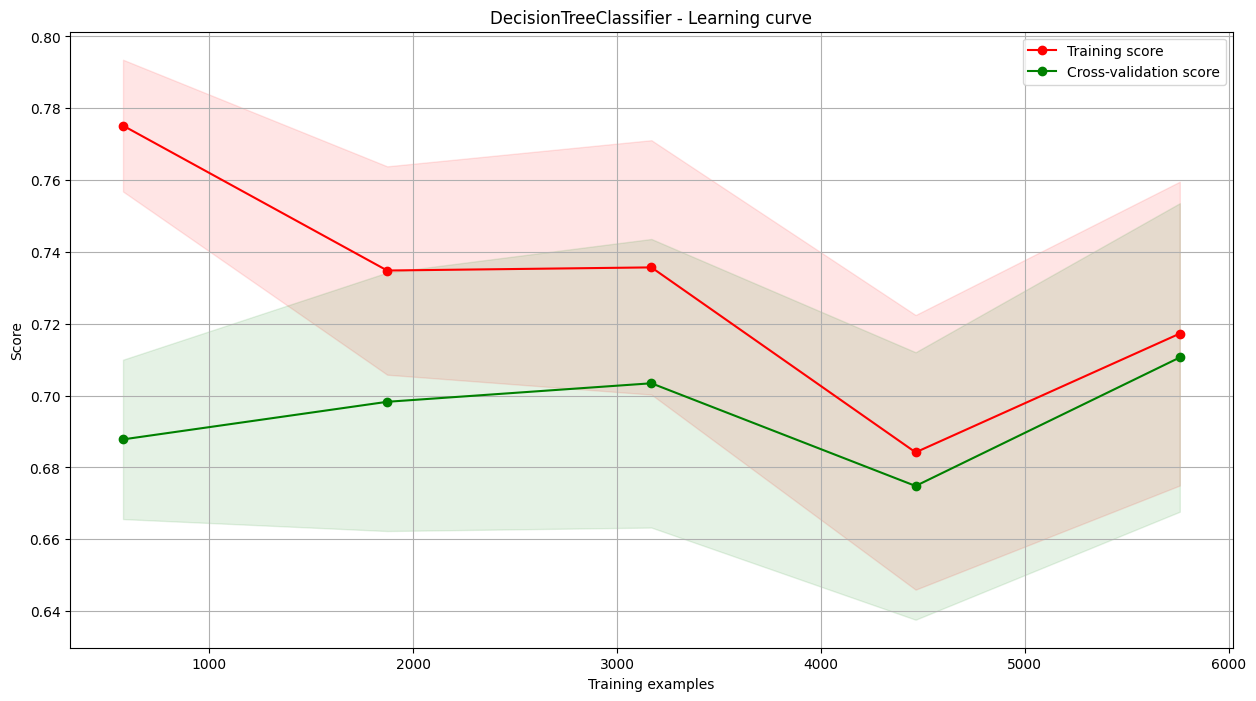

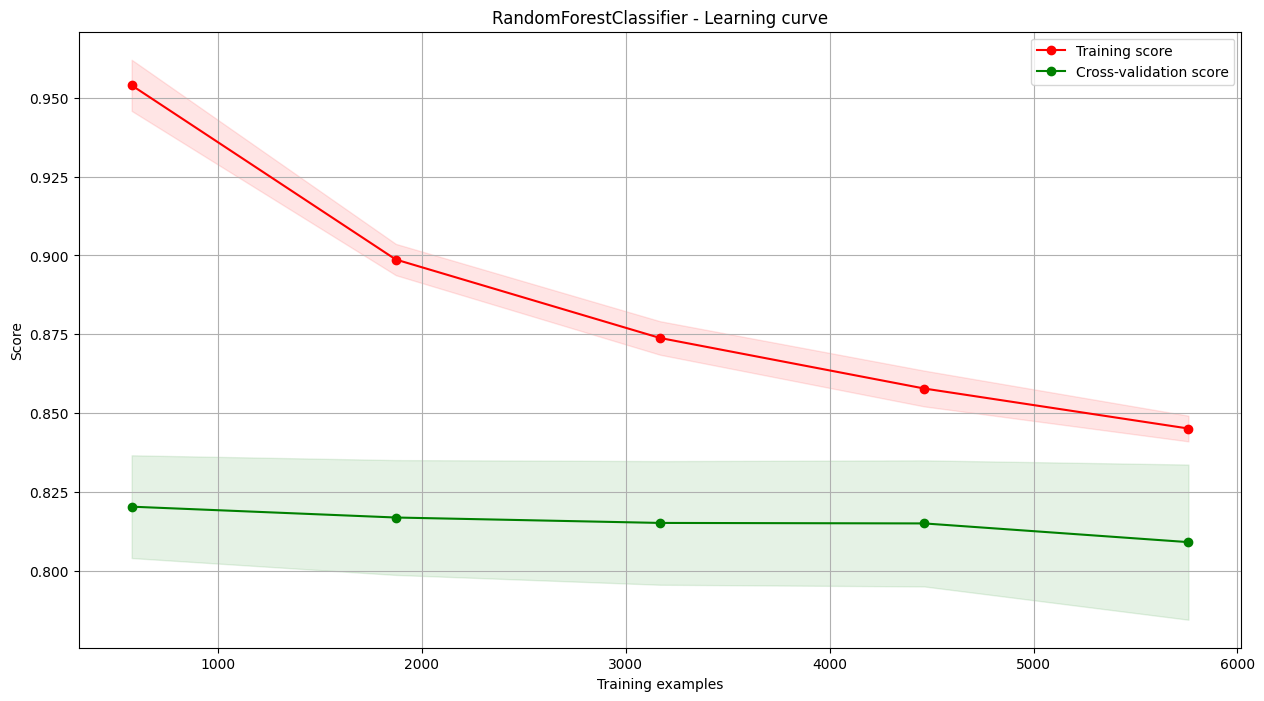

In [67]:
for i in range(len(hyperparams_metrics)):
    pkl_file = open(os.getcwd()+'/'+hyperparams_metrics['model_path'][i],'rb')
    model_pkl=pickle.load(pkl_file)    
    plot_learning_curve(estimator = model_pkl,title = f"{hyperparams_metrics['model'][i]} - Learning curve",
                    X = X_train, y = y_train, cv = K_fold)
                   

**Observaciones:**

- Mejora en las métricas, gracias a la modificación de los hiperparámetros. 

**Propuestas:**

- Realizar un **balanceo de los datos**, con el fin de seguir mejorando las métricas y ajustar al máximo el modelo.
- También comprobar si realizando un **tratamiento previo de los datos** se ve mejorado el modelo:
    * Feature selection
    * Feature engineering




<a href='2b-ML_BalancedData.ipynb'>Ver siguiente notebook</a>

In [18]:
data_2 = {
    'Color': ['Red', 'Blue', 'Green', 'Red', 'Blue']
}

# Convert the data to a DataFrame
df_prueba = pd.DataFrame(data_2)

# Create a OneHotEncoder object
onehot_encoder = OneHotEncoder()

In [19]:
modelo = onehot_encoder.fit_transform(df_prueba)

In [20]:
df_encorder = pd.DataFrame(modelo.toarray())

In [22]:
df_encorder

,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [23]:
df_encorder.rename(columns={0: 'Red', 1: 'Blue', 2: 'Green'})

,Red,Blue,Green
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
